# predict the category using description

- Q1: Show how you would clean and process the data
- Q2: Show how you would visualize this data
- Q3: Show how you would measure the accuracy of the model
- Q4: What ideas do you have to improve the accuracy of the model? What other algorithms would you try?


<img src="data/flipkart_global_categories.png" style="height:75%;width:75%;"/>
<div align="center">
    Category Screenshot from flipkart on 27th March 2021
</div>

In [ ]:
import pandas as pd
import os
from cleantext import clean
import json

In [2]:
data_df = pd.read_csv(os.path.join(os.getcwd(),'created_category','flipkart_com-ecommerce_sample.csv'))


In [3]:
data_df.head(10)
columns_imp = ['uniq_id','product_category_tree','description']
data_df[columns_imp]

,uniq_id,product_category_tree,description
0,c2d766ca982eca8304150849735ffef9,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...
...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996,71ac419198359d37b8fe5e3fffdfee09,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997,93e9d343837400ce0d7980874ece471c,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...
19998,669e79b8fa5d9ae020841c0c97d5e935,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...


In [4]:
data_df['description_text_lower'] = data_df['description'].str.lower()
data_df.dropna(subset=['description'],inplace=True)
data_df.shape



(19998, 16)

In [5]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

In [6]:
import re

data_df['num_words'] = data_df.apply(lambda row: tokenizer(row['description_text_lower']),axis=1).apply(len)
data_df['num_char'] = data_df['description_text_lower'].str.replace(" ", "").apply(len)
data_df['num_punc'] = data_df['num_char'] - data_df['description_text_lower'].apply(
    lambda x: len(re.findall('[\w]', str(x))))

As we can see from the distribution arround approx 80% rercords have tokens of range 190 to 200, So we decide to padding sequence length to be 200


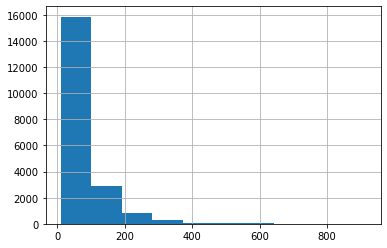

In [181]:
'''Word distribution of description_text_lower'''
data_df.apply(lambda row: tokenizer(row['description_text_lower']),axis=1).apply(len).hist()
#apply(lambda row: valuation_formula(row['age']), axis=1)
print("As we can see from the distribution arround approx 80% rercords have tokens of range 190 to 200, So we decide to padding sequence length to be 200")

In [9]:
'''Creating the category list for each row/observation '''
out_list = []
for node in data_df.apply(lambda row:  eval((row['product_category_tree'])),axis=1):
    if len(node) > 0:
        for n in node:
            if len(n.split(">>")) > 0:
                out_list.append(n.split(">>"))
#        out_list.append(in_list)
    else:
        print(str(node))
'''Calculating max deep of the category tree and row'''
max_ = 0
index_ = 0
node_list = []
for index,node in enumerate(out_list):
    _max_ = len(node)
    if _max_ > max_:
        max_ = _max_
        index_ = index
        node_list = node
print(max_)
print(index_)
print(node_list)

8
1481
['Clothing ', " Kids' Clothing ", ' Infants Wear ', ' Baby Girls ', ' Innerwear & Sleepwear ', ' Vests ', ' Adt Saral Vests ', " Adt Saral Baby Girl's Vest"]


In [11]:
'''Save the Product category distribution for each descrption'''
'''Structuring the category labels'''
max_deept_tree = 8
category_level_column_list = ['category_L_' + str(i+1) for i in range(0,max_deept_tree)]

for i, topic in zip(range(0, max_deept_tree), category_level_column_list):
    data_df[topic] = 'Unknow'



for index, row in data_df.iterrows():
    node_ = eval(row['product_category_tree'])
    for n_ in node_:
        categroy_split_list = n_.split(">>")
        for index_, catgy_node in enumerate(categroy_split_list):
            data_df.at[index,'category_L_'+str(index_+1)] = catgy_node.strip() 

In [13]:
'''dropping some columns'''
data_df.drop(['crawl_timestamp','product_url','retail_price','discounted_price','is_FK_Advantage_product','product_rating'], axis=1, inplace=True)


In [14]:
data_df.columns

Index(['uniq_id', 'product_name', 'product_category_tree', 'pid', 'image',
       'description', 'overall_rating', 'brand', 'product_specifications',
       'description_text_lower', 'num_words', 'num_char', 'num_punc',
       'category_L_1', 'category_L_2', 'category_L_3', 'category_L_4',
       'category_L_5', 'category_L_6', 'category_L_7', 'category_L_8'],
      dtype='object')

In [15]:
unique_labels = set(data_df['product_category_tree'])
print('From {}, Number of unique labels:'.format(data_df.shape[0]), len(unique_labels))

From 19998, Number of unique labels: 6466


In [16]:
from IPython.display import display, HTML
from collections import Counter
label_count = Counter(data_df['product_category_tree']).most_common()
print('5 most frequent labels:')
display()
display(HTML(pd.DataFrame(label_count[:5],columns=['product_category_tree','count']).to_html()))

print('\n 10 least frequent labels:')
display(HTML(pd.DataFrame(label_count[-10:],columns=['product_category_tree','count']).to_html()))                          

5 most frequent labels:


,product_category_tree,count
0,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",1567
1,"[""Jewellery >> Rings""]",710
2,"[""Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats""]",522
3,"[""Jewellery >> Bangles, Bracelets & Armlets >> Bangles""]",430
4,"[""Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets""]",332



 10 least frequent labels:


,product_category_tree,count
0,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Meish Dresses""]",1
1,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Love From India Dresses""]",1
2,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Kashana Dresses""]",1
3,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Madaam Dresses""]",1
4,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Koma Store Dresses""]",1
5,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> HUGO CHAVEZ Dresses""]",1
6,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Kashana Fashions Dresses""]",1
7,"[""Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Dresses >> Indibox Dresses""]",1
8,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",1
9,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers""]",1


In [ ]:
data_df[['uniq_id','product_name','clean_text'+ category_level_column_list]]
data_df.columns

### Q1 Noise Detection
### clean and process the data

Product Description on e-commerce platforms are usually noisy. And our dataset is no exception. Let's filter them out and see some examples

In [19]:
import string

ascii_set = set(string.printable)

## Expand this list if there are symbols you don't think are noise
expansion = ['®', '”', '™', 'é', '°', '–', '“', '³', 'ü', 'ū', 'Ë', '©', '®',
            '½', '″', '’', '¯', 'à', '‘', 'è', '‘', '’', '|', '&', 
            'ë', 'ē', 'é', '\xa0', 'Ç', 'µ', '&Nbsp;', 'é', 'ó']

ascii_set.update(expansion)

# Note there are cases of these XML escape chars in the title too.
['&Nbsp;']

def has_non_ascii(s):
    s = str(s)
    return any(ch for ch in s if ch not in ascii_set)

latin1_des = []

def append_to_latin1_list(x):
    if has_non_ascii(x):
        latin1_des.append(x)

latin1 = data_df['description_text_lower'].apply(append_to_latin1_list)
print('Number of noisy entries:', len(latin1_des))
print(latin1_des[:10])

Number of noisy entries: 148
["fabhomedecor fabric double sofa bed (finish color - leatherette black mechanism type - pull out) price: rs. 22,646 • fine deep seating experience • save space with the all new click clack sofa bed • easy to fold and vice versa with simple click clack mechanism • chrome legs with mango wood frame for long term durability • double cushioned sofa bed to provide you with extra softness to make a fine seating experience • a double bed that can easily sleep two,specifications of fabhomedecor fabric double sofa bed (finish color - leatherette black mechanism type - pull out) installation & demo installation & demo details installation and demo for this product is done free of cost as part of this purchase. our service partner will visit your location within 72 business hours from the delivery of the product. in the box 1 sofa bed general brand fabhomedecor mattress included no delivery condition knock down storage included no mechanism type pull out type sofa be

In [182]:
'''Some mandatory check for clean the textual data'''
'''You can cross check from the above cell and the current cell output'''
from cleantext import clean
def _clean_text_(text):
    _text = clean(text=text,
           fix_unicode = True,
           to_ascii = True,
           lower = False,  # lowercase text
           no_line_breaks = False,  # fully strip line breaks as opposed to only normalizing them
           no_urls = True,  # replace all URLs with a special token
           no_emails = True,  # replace all email addresses with a special token
           no_phone_numbers = False,  # replace all phone numbers with a special token
           no_numbers = False,  # replace all numbers with a special token
           no_digits = False,  # replace all digits with a special token
           no_currency_symbols = False,  # replace all currency symbols with a special token
           no_punct = True,  # fully remove punctuation
           replace_with_url = " ",
           replace_with_email = " ",
           lang = "en")
    return _text
print([_clean_text_(n) for n in latin1_des[:10]])


['fabhomedecor fabric double sofa bed finish color leatherette black mechanism type pull out price rs 22646 fine deep seating experience save space with the all new click clack sofa bed easy to fold and vice versa with simple click clack mechanism chrome legs with mango wood frame for long term durability double cushioned sofa bed to provide you with extra softness to make a fine seating experience a double bed that can easily sleep twospecifications of fabhomedecor fabric double sofa bed finish color leatherette black mechanism type pull out installation demo installation demo details installation and demo for this product is done free of cost as part of this purchase our service partner will visit your location within 72 business hours from the delivery of the product in the box 1 sofa bed general brand fabhomedecor mattress included no delivery condition knock down storage included no mechanism type pull out type sofa bed style contemporary modern filling material microfiber seating

In [21]:
'''clean_text column now'''
data_df['clean_text'] = data_df.apply(lambda row: _clean_text_(row['description_text_lower']),axis=1)

In [183]:
from ipywidgets import interact, interactive,widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_pie_dist(column_select):
    vc = data_df[column_select].value_counts()
    ## Change the "kind" parameter to "bar" if you prefer a histogram
    vc.plot(kind='pie', colormap='Spectral_r', figsize=(6, 6))
    first_lev_count = Counter(data_df[column_select]).most_common()
    print('No. of Unique category for {} is {} & frequent labels count with pie plot'.format(vc.shape[0],column_select))
    display(HTML(pd.DataFrame(first_lev_count,columns=[column_select,'count']).to_html()))
    return None
options_list = category_level_column_list
stats = interact(show_pie_dist,
                column_select=widgets.Dropdown(options=options_list))

interactive(children=(Dropdown(description='column_select', options=('category_L_1', 'category_L_2', 'category…

In [25]:
data_df[['uniq_id','product_name','clean_text'+ category_level_column_list]]

,uniq_id,product_name,product_category_tree,pid,image,description,overall_rating,brand,product_specifications,description_text_lower,...,num_punc,category_L_1,category_L_2,category_L_3,category_L_4,category_L_5,category_L_6,category_L_7,category_L_8,clean_text
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,"[""http://img5a.flixcart.com/image/short/u/4/a/...",Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features of alisha solid women's cycling s...,...,7,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,Unknow,Unknow,key features of alisha solid womens cycling sh...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",fabhomedecor fabric double sofa bed (finish co...,...,81,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Unknow,Unknow,Unknow,Unknow,fabhomedecor fabric double sofa bed finish col...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",key features of aw bellies sandals wedges heel...,...,14,Footwear,Women's Footwear,Ballerinas,AW Bellies,Unknow,Unknow,Unknow,Unknow,key features of aw bellies sandals wedges heel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,"[""http://img5a.flixcart.com/image/short/6/2/h/...",Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features of alisha solid women's cycling s...,...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,Unknow,Unknow,key features of alisha solid womens cycling sh...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,"[""http://img5a.flixcart.com/image/pet-shampoo/...",Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",specifications of sicons all purpose arnica do...,...,4,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),Unknow,Unknow,Unknow,specifications of sicons all purpose arnica do...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,"[""http://img6a.flixcart.com/image/wall-decorat...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",buy walldesign small vinyl sticker for rs.730 ...,...,6,Baby Care,Baby & Kids Gifts,Stickers,WallDesign Stickers,Unknow,Unknow,Unknow,Unknow,buy walldesign small vinyl sticker for rs730 o...
19996,71ac419198359d37b8fe5e3fffdfee09,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,"[""http://img6a.flixcart.com/image/sticker/z/g/...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",buy wallmantra large vinyl stickers sticker fo...,...,6,Baby Car

## Q2: Show how you would visualize this data
#### from the above cell output, No. of Unique label & frequent labels count, where Unknow is unavailable of label
- No. of Unique category_L_1 is 265, where Unknown is Nan but the distribution count is very skewed as we see.
- No. of Unique category_L_2 is 217, where Unkown count is 328
- No. of Unique category_L_3 is 875, where Unkown count is 1457
- No. of Unique category_L_4 is 2348, where Unkown count is 5875 (which is more then 25% of complete data)
- No. of Unique category_L_5 is 2623, where Unkown count is 10640 (which is more then 50% of complete data)
- No. of Unique category_L_6 is 2330, where Unkown count is 15551 (which is more then 75% of complete data)
- No. of Unique category_L_7 is 556, where Unkown count is 19190 (which is more then 90% of complete data)
- No. of Unique category_L_8 is 19, where Unkown count is 19968 (which is more then 90% of complete data)

#### As we see level 1 and  level 2 have approx same no. of category label, So suggestion is that we should do some correct annotation for level and make the level 1 distribution count correctly, and if we wan to build such a deep tree then we should have proper category/label value as we see after level 4 half of the label/node value are missing from the tree category. So while building the model, I have consider 4th level deep tree category sequence to predict it.

In [37]:
result = data_df[['uniq_id','product_name','clean_text']+ category_level_column_list].to_json(orient = 'records')
parsed = json.loads(result)
all_stopwords = nlp.Defaults.stop_words
all_stopwords

In [179]:
'''creating the key: value pair dictnanry to transform the label/category to numeric state for the model input'''
def category_dict_mapping(category_L_column,data_df_):
    count_ = 0
    dict_ = {}
    for node, count in Counter(data_df[category_L_column]).most_common():
        count_ += 1
        dict_[node] = count_
    return dict_
category_dict_mapping('category_L_2',data_df)

{"Women's Clothing": 1,
 "Men's Clothing": 2,
 'Necklaces & Chains': 3,
 'Accessories & Spare parts': 4,
 'Tablet Accessories': 5,
 "Women's Footwear": 6,
 'Rings': 7,
 'Bangles, Bracelets & Armlets': 8,
 'Wrist Watches': 9,
 "Kids' Clothing": 10,
 'Tools': 11,
 'Fragrances': 12,
 'Laptop Accessories': 13,
 "Men's Footwear": 14,
 'Unknow': 15,
 'Mobile Accessories': 16,
 'Showpieces': 17,
 'Coffee Mugs': 18,
 'School Supplies': 19,
 'Wall Decor & Clocks': 20,
 'Bed Linen': 21,
 'Baby & Kids Gifts': 22,
 'Network Components': 23,
 'Bags': 24,
 'Infant Wear': 25,
 'Jewellery Sets': 26,
 'Curtains & Accessories': 27,
 'Table Decor & Handicrafts': 28,
 'Office Supplies': 29,
 'Accessories': 30,
 "Kids' & Infant Footwear": 31,
 'Bath Linen': 32,
 'Cookware': 33,
 'Earrings': 34,
 'Cushions, Pillows & Covers': 35,
 'Decorative Lighting & Lamps': 36,
 'Combos and Kits': 37,
 'Camera Accessories': 38,
 'Makeup': 39,
 'Pet Furniture': 40,
 'Body and Skin Care': 41,
 'Kitchen Tools': 42,
 'Car &

In [58]:
'''creating the dict of each category'''
category_L_1_dict = category_dict_mapping("category_L_1",data_df)
category_L_2_dict = category_dict_mapping("category_L_2",data_df)
category_L_3_dict = category_dict_mapping("category_L_3",data_df)
category_L_4_dict = category_dict_mapping("category_L_4",data_df)
category_L_5_dict = category_dict_mapping("category_L_5",data_df)
category_L_6_dict = category_dict_mapping("category_L_6",data_df)
category_L_7_dict = category_dict_mapping("category_L_7",data_df)
category_L_8_dict = category_dict_mapping("category_L_8",data_df)

In [161]:
'''Generating the data for runnong the model'''
outlist_node = []
for node in parsed:
    word_list = [str(word) for word in tokenizer(_clean_text_(node['clean_text']).lower()) if not word in all_stopwords]
    node.update({'abstract': word_list})
    node.update({'process_Token_length' : len(word_list)})
    node.update({'title' : [str(word) for word in tokenizer(node['product_name'].lower()) if not word in all_stopwords]})
    node.update({'section' : [category_L_1_dict[node['category_L_1']]]})
    node.update({'subsection' : [category_L_2_dict[node['category_L_2']]]})
    node.update({'group' : [category_L_3_dict[node['category_L_3']]]})
    node.update({'subgroup' : [category_L_4_dict[node['category_L_4']]]})
    node.update({'labels' : [category_L_1_dict[node['category_L_1']],category_L_2_dict[node['category_L_2']],
                             category_L_3_dict[node['category_L_3']],category_L_4_dict[node['category_L_4']]]})
    outlist_node.append(node)

In [186]:
data_2_run = pd.DataFrame(outlist_node)
data_2_run

,uniq_id,product_name,clean_text,category_L_1,category_L_2,category_L_3,category_L_4,category_L_5,category_L_6,category_L_7,category_L_8,title,abstract,section,subsection,group,subgroup,labels,process_Token_length
0,9d3fbdf2d14b64e97703ef7bd6950b0f,Zebra Outdoors,specifications of zebra outdoors general ideal...,Footwear,Kids' & Infant Footwear,For Girls,Sports Shoes,Zebra Outdoors,Unknow,Unknow,Unknow,"[zebra, outdoors]","[specifications, of, zebra, outdoors, general,...",[3],[31],[80],[87],"[3, 31, 80, 87]",80
1,e9fbc0f287fa176b41c5e1927e433774,SNE Book Cover for Karbonn A37,sne book cover for karbonn a37 pink\n price rs...,Mobiles & Accessories,Tablet Accessories,Cases & Covers,SNE Cases & Covers,Unknow,Unknow,Unknow,Unknow,"[sne, book, cover, for, karbonn, a37]","[sne, book, cover, for, karbonn, a37, pink, \n...",[4],[5],[6],[278],"[4, 5, 6, 278]",67
2,ad2206edb32ecc3bb659e4446e9cfd76,Legmark Slim Fit Women's Light Blue Jeans,key features of legmark slim fit womens light ...,Legmark Slim Fit Women's Light Blue Jeans,Unknow,Unknow,Unknow,Unknow,Unknow,Unknow,Unknow,"[legmark, slim, fit, women's, light, blue, jeans]","[key, features, of, legmark, slim, fit, womens...",[153],[15],[3],[1],"[153, 15, 3, 1]",124
3,e87b74208e10033ab3cb7911550e1e85,Aaishwarya Offwhite Irregulare Shapes Alloy Ne...,aaishwarya offwhite irregulare shapes alloy ne...,Jewellery,Necklaces & Chains,Necklaces,Unknow,Unknow,Unknow,Unknow,Unknow,"[aaishwarya, offwhite, irregulare, shapes, all...","[aaishwarya, offwhite, irregulare, shapes, all...",[2],[3],[2],[1],"[2, 3, 2, 1]",31
4,2dfc45798e307d9b711f18f6bd6dd163,VGreen Plant Container Set,buy vgreen plant container set for rs1390 onli...,Tools & Hardware,Tools,Gardening Tools,Plant Containers & Sets,Plant Container Sets,Unknow,Unknow,Unknow,"[vgreen, plant, container, set]","[buy, vgreen, plant, container, set, for, rs13...",[13],[11],[12],[7],"[13, 11, 12, 7]",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,f6e99270b2ad79aa1acd14c43371fe8b,Numero Uno Solid Men's V-neck T-Shirt,numero uno solid mens vneck tshirt buy navy nu...,Clothing,Men's Clothing,T-Shirts,Numero Uno T-Shirts,Unknow,Unknow,Unknow,Unknow,"[numero, uno, solid, men's, v-neck, t-shirt]","[numero, uno, solid, mens, vneck, tshirt, buy,...",[1],[2],[5],[12],"[1, 2, 5, 12]",33
19994,700ced9c642bf2be08ac946f558ce7f4,Allure Auto CM 2024 Car Mat Honda Jazz,buy allure auto cm 2024 car mat honda jazz for...,Automotive,Accessories & Spare parts,Car Interior & Exterior,Car Interior,Car Mats,Unknow,Unknow,Unknow,"[allure, auto, cm, 2024, car, mat, honda, jazz]","[buy, allure, auto, cm, 2024, car, mat, honda,...",[5],[4],[7],[4],"[5, 4, 7, 4]",36
19995,e24ef34ede03630207f0d367f633d8ea,Chappin & Nellson CNL-50-White-RG Analog Watch...,chappin nellson cnl50whiterg analog watch for ...,Watches,Wrist Watches,Chappin & Nellson Wrist Watches,Unknow,Unknow,Unknow,Unknow,Unknow,"[chappin, &, nellson, cnl-50-white-rg, analog,...","[chappin, nellson, cnl50whiterg, analog, watch...",[11],[9],[416],[1],"[11, 9, 416, 1]",38
19996,2734cb9ea06f33152c4dbe95d4809732,"Denver Rage,Force Gift Set Combo Set",flipkartcom buy denver rageforce gift set comb...,Beauty and Personal Care,Fragrances,Deodorants,Combos,Denver Combos,Unknow,Unknow,Unknow,"[denver, rage,force, gift, set, , combo, set]","[flipkartcom, buy, denver, rageforce, gift, se...",[7],[12],[11],[6],"[7, 12, 11, 6]",27


In [163]:
'''shuffle the data points randoms & distributes the dataset in train, val and test'''
import random
random.shuffle(outlist_node)
n_val = 1500
n_test = 1500
random.shuffle(outlist_node)
n_train = data_2_run.shape[0] - n_val - n_test
df_train_json = outlist_node[:n_train]
df_test_json = outlist_node[n_train:n_train + n_val]
df_val_json = outlist_node[n_train + n_val:]

In [164]:
'''DataSet size for train, val and test'''
len(df_train_json),len(df_val_json),len(df_test_json)

(16998, 1500, 1500)

In [172]:
import json
def json_lines_dumps(file_path, obj):
    with open(file_path, 'w') as f:
        for item in obj:
            f.write(json.dumps(item) + "\n")

In [173]:
'''writing the dataset in json file to run the model'''
base_path = "/Users/vsuman/PycharmProjects/harn/Hierarchical-Multi-Label-Text-Classification/data"
train_file_name = "flipkart_train_.json"
test_file_name = "flipkart_test_.json"
val_file_name = "flipkart_val_.json"
json_lines_dumps(os.path.join(base_path,train_file_name),df_train_json)
json_lines_dumps(os.path.join(base_path,test_file_name),df_test_json)
json_lines_dumps(os.path.join(base_path,val_file_name),df_val_json)

#### Now we will be taking about the Model we trained: Hierarchical-Multi-Label-Text-Classification: Hierarchical Attention-based Recurrent Network

![Network Structure](/data/NN_struc.png)
- Objective of the project is to solve the hierarchical multi-label text classification (HMTC) problem. Different from the multi-label text classification, HMTC assigns each instance (object) into multiple categories and these categories are stored in a hierarchy structure, is a fundamental but challenging task of numerous applications
- Many real-world applications organize data in a hierarchical structure, where classes are specialized into subclasses or grouped into superclasses.
- Step 1: Category Level 1 265 categories, you should index this 265 categories first, like: *{"Clothing": 1, "Mobiles & Accessories": 2, "Footwear": 3 ....... 265 category at level 1}*
- Step 2: Similarly Category Level 2 217 categories, you should index this 217 categories and for the next 4 level of categories or more deeper level currently i wrote till 4 level category.
- Each recod points look like, 

*{"uniq_id": "e3cc0aebe4386d3a5560e0124b0289da", "product_name": "Trident Cotton Set of Towels", "clean_text": "buy trident cotton set of towels at rs 599 at flipkartcom only genuine products free shipping cash on delivery", "category_L_1": "Home Furnishing", "category_L_2": "Bath Linen", "category_L_3": "Towels", "category_L_4": "Unknow", "category_L_5": "Unknow", "category_L_6": "Unknow", "category_L_7": "Unknow", "category_L_8": "Unknow", "title": ["trident", "cotton", "set", "of", "towels"], "abstract": ["buy", "trident", "cotton", "set", "of", "towels", "at", "rs", "599", "at", "flipkartcom", "only", "genuine", "products", "free", "shipping", "cash", "on", "delivery"], "section": [8], "subsection": [32], "group": [36], "subgroup": [1], "labels": [8, 32, 36, 1], "process_Token_length": 19}*
        - "uniq_id": just the uniq_id.
        -"title" & "abstract": it's the word segment (after cleaning stopwords).
        -"section": it's the first level category index.
        -"subsection": it's the second level category index.
        -"group": it's the third level category index.
        -"subgroup": it's the fourth level category index.
        -"labels": it's the total category which add the index offset.
        
- As our total category is 3705 count if we sum all the 4th level of tree category strucutre
- We calculated the Accuracy on the test data in two way as it's sequence2sequence model architecture
    - Global level which is one hot vector of size 3705 which estimate the sequence/order of label/tree.
    - Each tree category level (with taking thershould of greater then 50% of confidence level.)
    - 2021-03-27 12:52:44,358 - INFO - [Global] Predict by threshold: Precision 0.910671, Recall 0.265838, F1 0.411542, AUC 0.972932, AUPRC 0.581683
    - 2021-03-27 12:53:29,619 - INFO - [Local] Predict by threshold in Level-1: Precision 0.889696, Recall 0.898, F1 0.893829, AUPRC 0.931605
    - 2021-03-27 12:54:10,489 - INFO - [Local] Predict by threshold in Level-2: Precision 0.63268, Recall 0.645333, F1 0.638944, AUPRC 0.710351
    - 2021-03-27 12:55:10,518 - INFO - [Local] Predict by threshold in Level-3: Precision 0.521854, Recall 0.525333, F1 0.523588, AUPRC 0.545793
    - 2021-03-27 12:56:25,783 - INFO - [Local] Predict by threshold in Level-4: Precision 0.51265, Recall 0.513333, F1 0.512991, AUPRC 0.531849
    - 2021-03-27 12:56:26,471 - INFO - All Done. (path of log file */logs/Test-Sat Mar 27 12:13:56 2021.log*)
- For the model training log (*/logs/Train-Fri Mar 26 18:26:41 2021.log*) and model had been trained for 3 epoch but due to time constraint can't run for more epoch as to submit the assignment, want to run with more experiments and check with different word embedding and some parameters as well.
- Pre-trained Word Vectors, we have used glove vector (by google) with 100 dim.
    - we can pre-training your word vectors(based on your corpus) in many ways:
    - Use glove tools to pre-train data.
    - Even can use other word embedding models like fasttext,Bert for model to pre-train data and run some experiments  and validate the model output.


#### Q4: What ideas do you have to improve the accuracy of the model? What other algorithms would you try?
- First thing category L1 & L2 distribution is higly skewed we should work on the right annontation label. I thought of unique count distributions for each tree level should like *[50, 217,875, 1500, 2500 and more deept will go to Decreasingly ]* rather then *[265, 217, 875, 2348, 2623, 556,19]*, which leads to more good accuracy
- And if we are going for more deept of tree above L4, we should have more data points to train the sequence otherwise model can be higly biased for the unknown category,which we lead to more overfit model towards category of unknown.
- we can try some ML model like SVM, Bayesion to test the individual Level model but for capturing the seq we should try to go for seq2seq NN side only, which you can see for the above accuracy as well.

- What else we can do more: 
    - Add Mlflow or wandDB for model cycle and keep the models expriments/run to track of more good way.
    - To run more experiment and build the proper report of the model and model cycel analytics.


## Project

The project structure is below:

```text
.
├── HARNN
│   ├── train.py
│   ├── layers.py
│   ├── ham.py
│   ├── test.py
│   └── visualization.py
├── utils
│   ├── checkmate.py
│   ├── param_parser.py
│   └── data_helpers.py
├── data
│   ├── word2vec_100.model.* [Need Download]
│   ├── Test_sample.json
│   ├── Train_sample.json
│   └── Validation_sample.json
├── LICENSE
├── README.md
└── requirements.txt
```

### Text Segment

1. You can use `spaCy`  package if you are going to deal with the English text data.

### Data Format

See data format in `data` folder which including the data sample files. For example:

```json
{"uniq_id": "e3cc0aebe4386d3a5560e0124b0289da", "product_name": "Trident Cotton Set of Towels", "clean_text": "buy trident cotton set of towels at rs 599 at flipkartcom only genuine products free shipping cash on delivery", "category_L_1": "Home Furnishing", "category_L_2": "Bath Linen", "category_L_3": "Towels", "category_L_4": "Unknow", "category_L_5": "Unknow", "category_L_6": "Unknow", "category_L_7": "Unknow", "category_L_8": "Unknow", "title": ["trident", "cotton", "set", "of", "towels"], "abstract": ["buy", "trident", "cotton", "set", "of", "towels", "at", "rs", "599", "at", "flipkartcom", "only", "genuine", "products", "free", "shipping", "cash", "on", "delivery"], "section": [8], "subsection": [32], "group": [36], "subgroup": [1], "labels": [8, 32, 36, 1], "process_Token_length": 19}
```

# Usage

## Options

### Input and output options
### make sure set working dir as '../Hierarchical-Multi-Label-Text-Classification'
```
  --train-file              STR    Training file.      		Default is `data/Train_sample.json`.
  --validation-file         STR    Validation file.      	Default is `data/Validation_sample.json`.
  --test-file               STR    Testing file.       		Default is `data/Test_sample.json`.
  --word2vec-file           STR    Word2vec model file.		Default is `data/word2vec_100.model`.
```

### Model option

```
  --pad-seq-len             INT     Padding Sequence length of data.                    Depends on data.
  --embedding-type          INT     The embedding type.                                 Default is 1.
  --embedding-dim           INT     Dim of character embedding.                         Default is 100.
  --lstm-dim                INT     Dim of LSTM neurons.                                Default is 256.
  --lstm-layers             INT     Number of LSTM layers.                              Defatul is 1.
  --attention-dim           INT     Dim of Attention neurons.                           Default is 200.
  --attention-penalization  BOOL    Use attention penalization or not.                  Default is True.
  --fc-dim                  INT     Dim of FC neurons.                                  Default is 512.
  --dropout-rate            FLOAT   Dropout keep probability.                           Default is 0.5.
  --alpha                   FLOAT   Weight of global part in loss cal.                  Default is 0.5.
  --num-classes-list        LIST    Each number of labels in hierarchical structure.    Depends on data.
  --total-classes           INT     Total number of labels.                             Depends on data.
  --topK                    INT     Number of top K prediction classes.                 Default is 5.
  --threshold               FLOAT   Threshold for prediction classes.                   Default is 0.5.
```

### Training option

```
  --epochs                  INT     Number of epochs.                       Default is 20.
  --batch-size              INT     Batch size.                             Default is 32.
  --learning-rate           FLOAT   Adam learning rate.                     Default is 0.001.
  --decay-rate              FLOAT   Rate of decay for learning rate.        Default is 0.95.
  --decay-steps             INT     How many steps before decy lr.          Default is 500.
  --evaluate-steps          INT     How many steps to evluate val set.      Default is 50.
  --l2-lambda               FLOAT   L2 regularization lambda.               Default is 0.0.
  --checkpoint-steps        INT     How many steps to save model.           Default is 50.
  --num-checkpoints         INT     Number of checkpoints to store.         Default is 10.
```

## Training

The following commands train the model.

```bash
$ python3 train_harnn.py
```


**You need to choose Training or Restore. (T for Training and R for Restore)**

After training, you will get the `/log` and  `/run` folder.

- `/log` folder saves the log info file.
- `/run` folder saves the checkpoints.

It should be like this:

```text
.
├── logs
├── runs
│   └── 1616763941 [a 10-digital format]
│       ├── bestcheckpoints
│       ├── checkpoints
│       ├── embedding
│       └── summaries
├── test_harnn.py
├── text_harnn.py
└── train_harnn.py
```

**The programs name and identify the model by using the asctime (It should be 10-digital number, like 1616763941).**

## Restore

When your model stops training for some reason and you want to restore training, you can:

In the beginning, you will see the program shows:


**And you need to input R for restore.**

Then you will be asked to give the model name (a 10-digital format, like 1616763941):


And the model will continue training from the last time.

## Test

The following commands test the model.

```bash
$ python3 test_harnn.py
```

Then you will be asked to give the model name (a 10-digital format, like 1616763941):


And you can choose to use the best model or the latest model **(B for Best, L for Latest)**:


Finally, you can get the `predictions.json` file under the `/outputs`  folder, it should be like:

```text
.
├── graph
├── logs
├── output
│   └── 1616763941
│       └── predictions.json
├── runs
│   └── 1616763941
│       ├── bestcheckpoints
│       ├── checkpoints
│       ├── embedding
│       └── summaries
├── test_harnn.py
├── text_harnn.py
└── train_harnn.py
```

